# This kernel is under active upgradation


######  Zillow's Mission: 

Is to “build the largest, most-trusted, and vibrant home-related marketplace in the world.” Spaulding noted that trust is paramount for a company like Zillow. He brought up how many real estate agents think Zillow is in business to cut brokers out of their industry.

###### Throughout this notebook. I have used plotly, which is a library built on top of d3.js that has a steep-learning curve JavaScript library. There are Plotly API for Matlab, R, Python that helps us to create interactive visuals and dashboards. In other words, we can manipulate data manipulations in Pandas DataFrame and create interactive visual works easily.


###### In this notebook I will be focusing on Exploratory Data Analysis on the Price Per Square Feets of the house  in the USA. My aim is to do visual analysis of price varrying from State to State and providing some basic answers to general questions about the dataset.


######  Report Structure: 
1. Importing the Libraries
2. Importing the Data Set
3. Exploring the Data Set
4. Basic Q/A Section
5. Data Analysis and Visualisation 
6. Conclusion 


######  Section 1: 
*  Importing the Libraries:


In [1]:
# section 1 importing Libs:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
# my style:
sns.set(style= "whitegrid")

# My favourite Library for visualisation 
from plotly import __version__
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

cf.go_offline()

import plotly.figure_factory as ff
import plotly.offline as py
##for online plotting use import plotly.plotly as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from plotly import tools

###  Section 2: 
  ######  Importing the Data Set 


In [3]:
df = pd.read_csv("pricepersqft.csv")
df_rent = pd.read_csv("price.csv")

### Let's see what both the dataset is about:
#### A brief information about the PPSFT dataset. 
*  Number of observations (n) = 11919 
*  Number of columns (p) = 81 
* 5 object type columns, rest are floats 

#### A brief information about the Rent  dataset. 
*  Number of observations (n) = 13131
*  Number of columns (p) = 81 
* Data Type: float(17), int(60), object(4)

###### Run dataframe.info() for more details

###### Head of the Datasets:

In [4]:
df.head(10)

City Code          City              Metro        County State  \
0       6181      New York           New York        Queens    NY   
1      12447   Los Angeles        Los Angeles   Los Angeles    CA   
2      17426       Chicago            Chicago          Cook    IL   
3      39051       Houston            Houston        Harris    TX   
4      13271  Philadelphia       Philadelphia  Philadelphia    PA   
5      40326       Phoenix            Phoenix      Maricopa    AZ   
6      18959     Las Vegas          Las Vegas         Clark    NV   
7       6915   San Antonio        San Antonio         Bexar    TX   
8      54296     San Diego          San Diego     San Diego    CA   
9      38128        Dallas  Dallas-Fort Worth        Dallas    TX   

   Population Rank  November 2010  December 2010  January 2011  February 2011  \
0                1            NaN            NaN           NaN            NaN   
1                2          1.578          1.578         1.580          1.582   
2                3          1.244          1.248         1.254          1.254   
3                4          0.788          0.784         0.784          0.786   
4                5          0.854          0.858         0.858          0.858   
5                6          0.764          0.766         0.766          0.766   
6                7          0.750          0.750         0.748          0.748   
7                8          0.694          0.698         0.700          0.700   
8                9          1.492          1.494         1.492          1.490   
9               10          0.802          0.810         0.818          0.824   

       ...       April 2016  May 2016  June 2016  July 2016  August 2016  \
0      ...            1.806     1.810      1.816      1.824        1.828   
1      ...            1.990     2.004      2.018      2.026        2.032   
2      ...            1.354     1.362      1.370      1.374        1.378   
3      ...            0.984     0.984      0.982      0.980        0.976   
4      ...            0.948     0.956      0.962      0.964        0.964   
5      ...            0.862     0.870      0.876      0.880        0.882   
6      ...            0.768     0.770      0.772      0.774        0.772   
7      ...            0.820     0.822      0.824      0.822        0.822   
8      ...            1.772     1.782      1.788      1.792        1.794   
9      ...            1.026     1.034      1.040      1.046        1.048   

   September 2016  October 2016  November 2016  December 2016  January 2017  
0           1.836         1.844          1.858          1.866         1.872  
1           2.038         2.042          2.048          2.056         2.064  
2           1.380         1.380          1.380          1.376         1.374  
3           0.974         0.974          0.976          0.976         0.974  
4           0.966         0.968          0.972          0.974         0.974  
5           0.884         0.886          0.890          0.892         0.894  
6           0.774         0.774          0.778          0.780         0.780  
7           0.822         0.824          0.830          0.834         0.836  
8           1.796         1.802          1.808          1.814         1.816  
9           1.050         1.054          1.060          1.062         1.064  

[10 rows x 81 columns]

In [5]:
df_rent.head(10)

City Code          City              Metro        County State  \
0       6181      New York           New York        Queens    NY   
1      12447   Los Angeles        Los Angeles   Los Angeles    CA   
2      17426       Chicago            Chicago          Cook    IL   
3      39051       Houston            Houston        Harris    TX   
4      13271  Philadelphia       Philadelphia  Philadelphia    PA   
5      40326       Phoenix            Phoenix      Maricopa    AZ   
6      18959     Las Vegas          Las Vegas         Clark    NV   
7       6915   San Antonio        San Antonio         Bexar    TX   
8      54296     San Diego          San Diego     San Diego    CA   
9      38128        Dallas  Dallas-Fort Worth        Dallas    TX   

   Population Rank  November 2010  December 2010  January 2011  February 2011  \
0                1            NaN            NaN           NaN            NaN   
1                2         2184.0         2184.0        2183.0         2188.0   
2                3         1563.0         1555.0        1547.0         1537.0   
3                4         1198.0         1199.0        1199.0         1200.0   
4                5         1092.0         1099.0        1094.0         1087.0   
5                6         1087.0         1080.0        1071.0         1067.0   
6                7         1188.0         1183.0        1178.0         1177.0   
7                8         1057.0         1043.0        1037.0         1032.0   
8                9         2070.0         2059.0        2043.0         2030.0   
9               10         1114.0         1135.0        1156.0         1159.0   

       ...       April 2016  May 2016  June 2016  July 2016  August 2016  \
0      ...             2334      2339       2345       2344         2336   
1      ...             2637      2662       2687       2704         2716   
2      ...             1684      1686       1687       1685         1681   
3      ...             1444      1446       1446       1443         1440   
4      ...             1206      1211       1218       1222         1223   
5      ...             1228      1236       1240       1240         1238   
6      ...             1222      1225       1227       1227         1227   
7      ...             1244      1245       1245       1241         1236   
8      ...             2414      2428       2438       2442         2441   
9      ...             1338      1347       1353       1358         1364   

   September 2016  October 2016  November 2016  December 2016  January 2017  
0            2324          2318           2321           2321          2322  
1            2723          2731           2740           2748          2753  
2            1675          1668           1656           1644          1632  
3            1438          1437           1437           1435          1430  
4            1220          1216           1211           1209          1212  
5            1238          1239           1241           1244          1247  
6            1228          1230           1234           1237          1239  
7            1234          1235           1239           1245          1250  
8            2442          2449           2457           2465          2469  
9            1370          1377           1385           1389          1391  

[10 rows x 81 columns]

###### A brief description about botht the data sets.
1. PPSFT dataset
2. Rent Dataset

In [6]:
df.describe()

City Code  Population Rank  November 2010  December 2010  \
count   11919.000000     11919.000000   10600.000000   10600.000000   
mean    77097.011998      5960.000000       0.860989       0.863896   
std    118093.323482      3440.863264       0.286088       0.286489   
min      3300.000000         1.000000       0.360000       0.358000   
25%     18762.000000      2980.500000       0.676000       0.678000   
50%     34637.000000      5960.000000       0.796000       0.799000   
75%     51298.500000      8939.500000       0.972000       0.974000   
max    737791.000000     11919.000000       4.482000       4.508000   

       January 2011  February 2011    March 2011    April 2011      May 2011  \
count  10600.000000   10744.000000  10829.000000  10878.000000  10885.000000   
mean       0.865602       0.864939      0.862232      0.860946      0.859769   
std        0.284910       0.281532      0.278903      0.277075      0.275870   
min        0.358000       0.358000      0.362000      0.366000      0.366000   
25%        0.680000       0.682000      0.680000      0.678000      0.678000   
50%        0.802000       0.802000      0.800000      0.800000      0.798000   
75%        0.976000       0.972000      0.970000      0.968000      0.968000   
max        4.558000       4.564000      4.548000      4.536000      4.528000   

          June 2011      ...         April 2016      May 2016     June 2016  \
count  10885.000000      ...       11919.000000  11919.000000  11919.000000   
mean       0.859848      ...           0.958509      0.962608      0.964971   
std        0.275311      ...           0.371177      0.373848      0.376643   
min        0.366000      ...           0.394000      0.392000      0.388000   
25%        0.678000      ...           0.732000      0.734000      0.734000   
50%        0.800000      ...           0.870000      0.872000      0.872000   
75%        0.968000      ...           1.072000      1.076000      1.080000   
max        4.536000      ...           6.252000      6.342000      6.404000   

          July 2016   August 2016  September 2016  October 2016  \
count  11919.000000  11919.000000    11919.000000  11919.000000   
mean       0.964989      0.963645        0.962379      0.962570   
std        0.378865      0.380334        0.381100      0.381545   
min        0.384000      0.382000        0.378000      0.378000   
25%        0.732000      0.730000        0.728000      0.728000   
50%        0.872000      0.870000        0.870000      0.870000   
75%        1.082000      1.080000        1.080000      1.082000   
max        6.452000      6.476000        6.486000      6.476000   

       November 2016  December 2016  January 2017  
count   11919.000000   11919.000000  11919.000000  
mean        0.963743       0.964275      0.964356  
std         0.381775       0.381395      0.381297  
min         0.378000       0.378000      0.378000  
25%         0.728000       0.730000      0.732000  
50%         0.870000       0.872000      0.872000  
75%         1.082000       1.080000      1.080000  
max         6.470000       6.440000      6.406000  

[8 rows x 77 columns]

In [7]:
df_rent.describe()

City Code  Population Rank  November 2010  December 2010  \
count   13131.000000     13131.000000   11348.000000   11348.000000   
mean    78126.756454      6566.000000    1327.100458    1331.831953   
std    119604.910806      3790.737527     652.531343     655.822002   
min      3300.000000         1.000000     547.000000     539.000000   
25%     18803.000000      3283.500000     982.000000     984.750000   
50%     34678.000000      6566.000000    1195.000000    1199.000000   
75%     51385.500000      9848.500000    1479.000000    1479.000000   
max    737791.000000     13131.000000   18787.000000   18848.000000   

       January 2011  February 2011    March 2011    April 2011      May 2011  \
count  11348.000000   11500.000000  11673.000000  11722.000000  11732.000000   
mean    1334.447744    1331.935217   1327.595819   1323.824518   1321.730822   
std      653.931315     647.853483    640.168818    636.392831    633.675563   
min      536.000000     542.000000    535.000000    533.000000    533.000000   
25%      986.000000     984.000000    979.000000    973.000000    971.000000   
50%     1201.500000    1201.000000   1201.000000   1196.000000   1194.000000   
75%     1479.000000    1477.000000   1473.000000   1471.000000   1472.000000   
max    19054.000000   19019.000000  18997.000000  18939.000000  19119.000000   

          June 2011      ...         April 2016      May 2016     June 2016  \
count  11732.000000      ...       13131.000000  13131.000000  13131.000000   
mean    1321.872826      ...        1466.406519   1470.625695   1472.876856   
std      631.981504      ...         813.253498    815.322324    819.417181   
min      536.000000      ...         543.000000    548.000000    547.000000   
25%      972.000000      ...        1041.000000   1044.000000   1046.000000   
50%     1193.000000      ...        1275.000000   1277.000000   1278.000000   
75%     1473.000000      ...        1625.000000   1630.000000   1633.000000   
max    19442.000000      ...       21344.000000  20547.000000  20400.000000   

          July 2016   August 2016  September 2016  October 2016  \
count  13131.000000  13131.000000    13131.000000  13131.000000   
mean    1471.627370   1468.666667     1465.817988   1465.572157   
std      823.317848    825.885842      826.421670    825.621199   
min      544.000000    539.000000      532.000000    527.000000   
25%     1043.500000   1038.000000     1034.000000   1032.000000   
50%     1276.000000   1270.000000     1268.000000   1266.000000   
75%     1629.000000   1628.000000     1628.000000   1630.500000   
max    20639.000000  20695.000000    20615.000000  20163.000000   

       November 2016  December 2016  January 2017  
count   13131.000000   13131.000000  13131.000000  
mean     1467.105247    1467.524636   1467.296550  
std       824.678612     821.891626    820.707579  
min       518.000000     517.000000    518.000000  
25%      1033.000000    1034.000000   1035.000000  
50%      1267.000000    1267.000000   1264.000000  
75%      1630.000000    1632.000000   1634.000000  
max     19460.000000   18605.000000  17985.000000  

[8 rows x 77 columns]

The above Data Frame gives the gerneral specification of the columns: 
Mean, Standard Deviation, Minimum, Maximum values in every column.
######  Alot of questions can be answered using the above DF:
1. Minimum, Maximum values in each columns.
2. What is the mean, standard deviation of the columns and get the specifications which we see in a Boxplot. 

### Section 3
######  Basic Question and Answer Section:

In [8]:
print("\n"+"In the month of November 2010, Maximum and Minimum Price Per Square Feet ")
print(df[df["November 2010"]==df["November 2010"].max()][["Metro","County", "November 2010"]])
print(df[df["November 2010"]==df["November 2010"].min()][["City","Metro", "County", "November 2010"]])
print("____________________________________________________________")

print("\n"+"In the month January 2011, Maximum and Minimum Price Per Square Feet ")
print(df[df["January 2011"]==df["January 2011"].max()][["City", "County", "January 2011"]])
print(df[df["January 2011"]==df["January 2011"].min()][["City","Metro", "County", "January 2011"]])
print("____________________________________________________________")

print("\n"+"In the month January 2012, Maximum and Minimum Price Per Square Feet ")
print(df[df["January 2012"]==df["January 2012"].max()][["City", "County", "January 2012"]])
print(df[df["January 2012"]==df["January 2012"].min()][["City","Metro", "County", "January 2012"]])
print("____________________________________________________________")

print("\n"+"In the month January 2013, Maximum and Minimum Price Per Square Feet ")
print(df[df["January 2013"]==df["January 2013"].max()][["City", "County", "January 2013"]])
print(df[df["January 2013"]==df["January 2013"].min()][["City","Metro", "County", "January 2013"]])
print("____________________________________________________________")

print("\n"+"In the month January 2014, Maximum and Minimum Price Per Square Feet ")
print(df[df["January 2014"]==df["January 2014"].max()][["City", "County", "January 2014"]])
print(df[df["January 2014"]==df["January 2014"].min()][["City","Metro", "County", "January 2014"]])
print("____________________________________________________________")

print("\n"+"In the month January 2015, Maximum and Minimum Price Per Square Feet ")
print(df[df["January 2015"]==df["January 2015"].max()][["City", "County", "January 2015"]])
print(df[df["January 2015"]==df["January 2015"].min()][["City","Metro", "County", "January 2015"]])
print("____________________________________________________________")

print("\n"+"In the month January 2016, Maximum and Minimum Price Per Square Feet ")
print(df[df["January 2016"]==df["January 2016"].max()][["City", "County", "January 2016"]])
print(df[df["January 2016"]==df["January 2016"].min()][["City","Metro", "County", "January 2016"]])
print("____________________________________________________________")



In the month of November 2010, Maximum and Minimum Price Per Square Feet 
                       Metro      County  November 2010
11627  Miami-Fort Lauderdale  Miami-Dade          4.482
               City     Metro   County  November 2010
6387  Fort Mitchell  Columbus  Russell           0.36
____________________________________________________________

In the month January 2011, Maximum and Minimum Price Per Square Feet 
                City      County  January 2011
11627  Fisher Island  Miami-Dade         4.558
               City     Metro   County  January 2011
6387  Fort Mitchell  Columbus  Russell         0.358
____________________________________________________________

In the month January 2012, Maximum and Minimum Price Per Square Feet 
                City      County  January 2012
11627  Fisher Island  Miami-Dade         4.602
         City Metro   County  January 2012
8480  Wheeler   NaN  Wheeler         0.358
____________________________________________________________


###### I hihgly recommend to use SQL to get more detailed and concise abstractions/answers from a data set but we can also do alot in Python. However the block of codes can get huge. 
* We can see in the above report The City :  Fisher Island, County: Miami- Dade has the highest Price Per Square Feet Rate in the begining of the all the Years. 
* While on the other hand the minimum Price Per Sq Ft has varied among the Cities: Fort Mitchell,  Wheeler, State Road County: Surry and Elkin.

### Section:
###### Data Analysis and Visualisation 

######  * Total number of listing for all the States: 

In [9]:
state_count = df["State"].value_counts()

trace = go.Bar(
    x=state_count.index,
    y=state_count.values,
    marker=dict(
        color = (["lightsteelblue", "lightyellow", "lime", "limegreen",
            "linen", "magenta", "maroon", "mediumaquamarine",
            "mediumblue", "mediumorchid", "mediumpurple","mediumblue", "mediumorchid", "mediumpurple", "hotpink", "indianred", "indigo",
            "ivory", "khaki", "lavender","lightyellow", "lime", "limegreen",
            "linen", "magenta", "maroon", "mediumaquamarine",
            "mediumblue", "mediumorchid", "mediumpurple", "hotpink", "indianred", "indigo",
            "ivory", "khaki", "lavender"])))
layout = go.Layout(
    title='States with Highest listing', yaxis = dict(title = 'Frequency'))
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)




label = state_count.index
size = state_count.values
colors = ["lightsteelblue", "lightyellow", "lime", "limegreen",
            "linen", "magenta", "maroon"]
trace = go.Pie(labels=label, 
               values=size, 
               marker=dict(colors=colors))
layout = go.Layout(
    title='State Distribution')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)



#plt.figure(figsize = (15, 8))
#sns.set_context("paper",font_scale= 2)
#sns.barplot(state_count.index, state_count.values, order = state_count.index)
#plt.xlabel("States")
#plt.xticks(rotation = 90)
#plt.ylabel("Total Number of Listings")
#plt.tight_layout()
#plt.show()

###### Top 20 Metro's distribution with highest listings:

In [10]:
# Highest 20 Metro's
metro_count = df["Metro"].value_counts().head(20)

trace = go.Bar(
    x=metro_count.index,
    y=metro_count.values,
    marker=dict(
        color = (["lightblue", "lightyellow", "lime", "limegreen",
            "linen", "magenta", "maroon", "mediumaquamarine",
            "mediumblue", "mediumorchid", "mediumpurple","mediumblue", "mediumorchid", "mediumpurple", "hotpink", "indianred", "indigo",
            "ivory", "khaki", "lavender" ])))

layout = go.Layout(
    title='20 Metro with Highest listing', yaxis = dict(title = 'Frequency'))

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

label = metro_count.index
size = metro_count.values
colors = ['skyblue', 'orange', '#96D38C', '#D0F9B1']
trace = go.Pie(labels=label, 
               values=size, 
               marker=dict(colors=colors))
layout = go.Layout(
    title='Top 20 Metro Distribution')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


# This block of code for Metro listing count plot is optional. (for my github page) 
# As plotly does not work on github.
#plt.figure(figsize=(25,10))
#sns.set_context("paper",font_scale= 2)
#sns.barplot(x=metro_count.index, y= metro_count.values, order= metro_count.index )
#plt.xlabel("Metro")
#plt.xticks(rotation = 90)
#plt.ylabel("Total Number of Listings")
#plt.tight_layout()
#plt.show()

In [11]:
years = list(set([y.split( )[1] for y in df.columns[6:]]))
months = df.columns[6:]

######  1. Let's explore more about Boston Metro:

In [12]:
# Getting a dataframe of boston city only:
boston = df[df["Metro"]=="Boston"]
boston.head()

City Code       City   Metro     County State  Population Rank  \
21       44269     Boston  Boston    Suffolk    MA               22   
286      25659     Lowell  Boston  Middlesex    MA              287   
289       3934  Cambridge  Boston  Middlesex    MA              290   
356      40013     Newton  Boston  Middlesex    MA              357   
357      44328   Brockton  Boston   Plymouth    MA              358   

     November 2010  December 2010  January 2011  February 2011      ...       \
21           1.774          1.776         1.798          1.830      ...        
286          1.156          1.156         1.150          1.140      ...        
289          2.128          2.156         2.206          2.266      ...        
356          1.678          1.688         1.700          1.700      ...        
357          1.042          1.040         1.040          1.048      ...        

     April 2016  May 2016  June 2016  July 2016  August 2016  September 2016  \
21        2.500     2.512      2.520      2.520        2.522           2.522   
286       1.358     1.374      1.388      1.398        1.402           1.404   
289       2.656     2.654      2.674      2.696        2.716           2.726   
356       1.822     1.828      1.840      1.846        1.848           1.846   
357       1.288     1.296      1.292      1.276        1.254           1.244   

     October 2016  November 2016  December 2016  January 2017  
21          2.524          2.524          2.522         2.516  
286         1.412          1.420          1.424         1.426  
289         2.732          2.748          2.754         2.756  
356         1.844          1.850          1.854         1.856  
357         1.244          1.250          1.256         1.258  

[5 rows x 81 columns]

In [13]:
boston_r = df_rent[df_rent["Metro"]=="Boston"]
boston_r.head()

City Code       City   Metro     County State  Population Rank  \
21       44269     Boston  Boston    Suffolk    MA               22   
284      25659     Lowell  Boston  Middlesex    MA              285   
287       3934  Cambridge  Boston  Middlesex    MA              288   
354      40013     Newton  Boston  Middlesex    MA              355   
355      44328   Brockton  Boston   Plymouth    MA              356   

     November 2010  December 2010  January 2011  February 2011      ...       \
21          1783.0         1771.0        1789.0         1819.0      ...        
284         1658.0         1631.0        1597.0         1565.0      ...        
287         2011.0         2036.0        2118.0         2200.0      ...        
354         3008.0         2977.0        2957.0         2909.0      ...        
355         1414.0         1415.0        1414.0         1415.0      ...        

     April 2016  May 2016  June 2016  July 2016  August 2016  September 2016  \
21         2500      2509       2506       2496         2490            2486   
284        1909      1943       1968       1980         1977            1969   
287        2572      2570       2584       2602         2625            2638   
354        3017      3014       3009       3000         3002            3011   
355        1747      1753       1740       1716         1692            1688   

     October 2016  November 2016  December 2016  January 2017  
21           2489           2495           2510          2524  
284          1972           1976           1989          2004  
287          2648           2662           2658          2648  
354          3024           3023           3019          3010  
355          1700           1718           1726          1724  

[5 rows x 81 columns]

In [14]:
boston_r = df_rent[df_rent["Metro"]=="Boston"]

In [15]:
# Let's see most expensive & least expensice city in boston:
print(" Highest Price Per Square Feet for Jan'10 and Jan'17")
print(boston[boston["November 2010"] == boston["November 2010"].max()][["City", "Metro", "November 2010"]])
print(boston[boston["January 2011"] == boston["January 2011"].max()][["City", "Metro", "January 2011"]])
print(boston[boston["January 2017"] == boston["January 2017"].max()][["City", "Metro", "January 2017"]])
print("_______________________________________________________")

print(" Lowest Price Per Square Feet for Jan'10 and Jan'17")
print(boston[boston["November 2010"] == boston["November 2010"].min()][["City", "Metro", "November 2010"]])
print(boston[boston["January 2011"] == boston["January 2011"].min()][["City", "Metro", "January 2011"]])
print(boston[boston["January 2017"] == boston["January 2017"].min()][["City", "Metro", "January 2017"]])
print("________________________________________________________")

 Highest Price Per Square Feet for Jan'10 and Jan'17
          City   Metro  November 2010
289  Cambridge  Boston          2.128
          City   Metro  January 2011
289  Cambridge  Boston         2.206
          City   Metro  January 2017
289  Cambridge  Boston         2.756
_______________________________________________________
 Lowest Price Per Square Feet for Jan'10 and Jan'17
         City   Metro  November 2010
9106  Madbury  Boston          0.708
         City   Metro  January 2011
9106  Madbury  Boston         0.726
        City   Metro  January 2017
6094  Auburn  Boston         0.856
________________________________________________________


###### Plot coparison between Median Rent and PPSFT in Boston

In [32]:
#Variable assig
bos_pi = boston["County"].value_counts()
colors = ["lightblue", "lightyellow", "lime", "limegreen","magenta", "maroon", "mediumaquamarine"]

# Pie chart
trace = go.Pie(labels=bos_pi.index,
              values = bos_pi.values, 
              marker= dict(colors = colors))

layout = go.Layout(title="Distribution in Boston")

data =[trace]
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

#For Scatter plot
trace = go.Scatter(x = months, 
                  y= np.nanmedian(boston[months], axis = 0),
                    mode='markers', marker=dict(size=3,color = ('orange')),
                   name = "Boston Median PPSFT")


In [31]:
#For Scatter plot
trace1 = go.Scatter(x = months, 
                  y= np.nanmedian(boston_r[months], axis = 0),
                    mode='markers', marker=dict(size=4,color = ('red')), 
                   name = "Boston Median Rent")


fig = tools.make_subplots(rows=1, cols=2,
                          subplot_titles=('PPSFT Boston','Median Rent Boston'))

fig.append_trace(trace, 1, 1)
fig.append_trace(trace1, 1, 2)

layout = go.Layout(title="Median index price of boston", 
                   xaxis= dict(title= "Months"),yaxis=dict(title="PPSFT"))

fig['layout'].update(showlegend=False, title='Price in Boston Per Square Feet VS Rent')
py.iplot(fig)


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



 ######  2. let's explore about New York Metro 
 
###### Comparing between New Jersey and New York

In [17]:
ny = df[df["Metro"]=="New York"]
ny.head(1)
ny_nj = ny.groupby("State")[months].median()


In [18]:
ny_rent = df_rent[df_rent["Metro"]=="New York"]
ny_rent.head(1)
ny_nj_rent = ny.groupby("State")[months].median()


In [30]:
stat1 = list (set([x for x in ny["State"]]))
#np.median(ny[ny["State"]==stat[0]][months], axis = 0)

# For Scatter Plot 
trace1 = go.Scatter(x = months, 
                  y= np.nanmedian(ny[ny["State"]==stat1[2]][months], axis = 0),
                    mode='markers', marker=dict(size=5,color = ('aqua')), 
                   name = "New York")
trace2 = go.Scatter(x = months, 
                  y= np.nanmedian(ny[ny["State"]==stat1[0]][months], axis = 0),
                    mode='markers', marker=dict(size=5,color = ('navy')),
                   name = "New Jersey")

layout = go.Layout(title="Median PPSFT price of NY, NJ", 
                   xaxis= dict(title= "Months"),yaxis=dict(title="PPSFT"))

data = [trace1, trace2]
fig = go.Figure(data = data, layout=layout)
py.iplot(fig)

/Users/keshavrastogi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning:

All-NaN slice encountered



In [26]:

trace1 = go.Scatter(x = months, 
                  y= np.nanmedian(ny_rent[ny_rent["State"]==stat1[2]][months], axis = 0),
                    mode='markers', marker=dict(size=5,color = ('aqua')), 
                   name = "New York")
trace2 = go.Scatter(x = months, 
                  y= np.nanmedian(ny_rent[ny_rent["State"]==stat1[0]][months], axis = 0),
                    mode='markers', marker=dict(size=5,color = ('navy')),
                   name = "New Jersey")



fig = tools.make_subplots(rows= 1 , cols=2, subplot_titles=('Median NY Rent','Median NJ Rent'))
fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1,2)

fig['layout'].update(showlegend=False, title='Median Rent Price of New York VS New Jersey')
py.iplot(fig)


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



/Users/keshavrastogi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning:

All-NaN slice encountered



In [27]:


# Box Plot block of code:
ny_gr = ny.groupby("State")[months].median()
print(ny_gr)
trace0 = go.Box(y=ny_gr.loc["NJ"],name="New Jersey",fillcolor='navy')
trace1 = go.Box(y=ny_gr.loc["NY"],name="New York",fillcolor='lime')
trace2 = go.Box(y=ny_gr.loc["PA"],name="Pensylvania",fillcolor='aqua')

layout = go.Layout(title  =" Boxplot of NY, NJ, PA")
data = [trace0, trace1, trace2]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

       November 2010  December 2010  January 2011  February 2011  March 2011  \
State                                                                          
NJ             1.210          1.220         1.224          1.228       1.232   
NY               NaN            NaN           NaN            NaN         NaN   
PA             0.738          0.746         0.751          0.750       0.747   

       April 2011  May 2011  June 2011  July 2011  August 2011      ...       \
State                                                               ...        
NJ          1.234     1.228      1.228      1.226        1.222      ...        
NY            NaN       NaN        NaN        NaN          NaN      ...        
PA          0.740     0.733      0.730      0.727        0.718      ...        

       April 2016  May 2016  June 2016  July 2016  August 2016  \
State                                                            
NJ          1.352     1.360      1.362      1.364        1.360   


###### 3.  Median PPSFT for all States:

In [20]:
states = list(df["State"].unique())
state_group = df.groupby("State")[months].median().reset_index()
state_group.head(5)

State  November 2010  December 2010  January 2011  February 2011  \
0    AK            NaN            NaN           NaN            NaN   
1    AL          0.598          0.600         0.602          0.601   
2    AR          0.554          0.562         0.564          0.564   
3    AZ          0.696          0.698         0.703          0.704   
4    CA          1.146          1.140         1.130          1.126   

   March 2011  April 2011  May 2011  June 2011  July 2011      ...       \
0       0.928       0.936     0.942      0.940      0.932      ...        
1       0.602       0.602     0.604      0.605      0.605      ...        
2       0.562       0.562     0.562      0.562      0.560      ...        
3       0.700       0.699     0.697      0.696      0.695      ...        
4       1.120       1.110     1.102      1.098      1.100      ...        

   April 2016  May 2016  June 2016  July 2016  August 2016  September 2016  \
0       0.964     0.966      0.958      0.956        0.954           0.952   
1       0.644     0.646      0.644      0.638        0.634           0.634   
2       0.632     0.636      0.634      0.628        0.626           0.624   
3       0.753     0.763      0.770      0.768        0.765           0.756   
4       1.246     1.248      1.257      1.260        1.265           1.266   

   October 2016  November 2016  December 2016  January 2017  
0         0.950          0.944          0.928         0.900  
1         0.634          0.634          0.636         0.634  
2         0.624          0.626          0.624         0.622  
3         0.756          0.758          0.760         0.762  
4         1.270          1.275          1.283         1.286  

[5 rows x 76 columns]

/Users/keshavrastogi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning:

All-NaN slice encountered



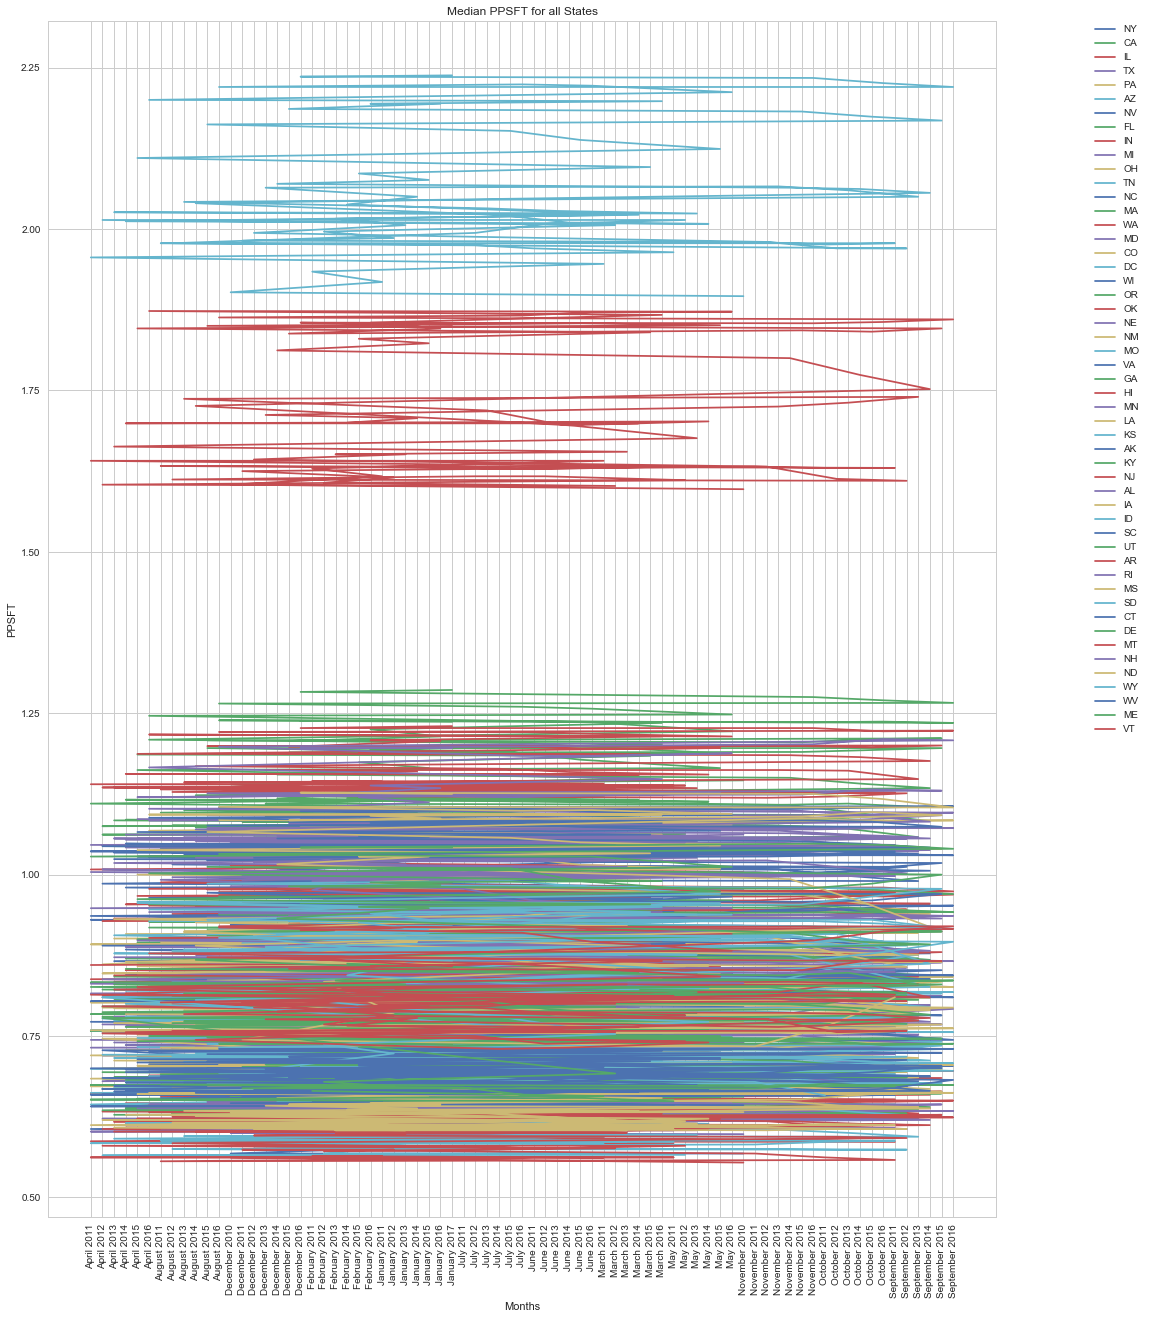

In [21]:
trace0 = go.Scatter(x= months, 
                    y = np.nanmedian(df[df["State"]=="NY"][months], axis = 0),
                    mode='markers', marker=dict(size=3),
                    name = "NY")

trace1 =go.Scatter(x= months, 
                    y = np.nanmedian(df[df["State"]=="CA"][months], axis = 0), mode='markers', marker=dict(size=3),
                   name = "CA")
trace2 = go.Scatter(x= months, 
                    y = np.nanmedian(df[df["State"]=="HI"][months], axis = 0),
                    mode='markers', marker=dict(size=3),
                    name = "HI")

trace3 = go.Scatter(x= months, 
                    y = np.nanmedian(df[df["State"]=="DC"][months], axis = 0), 
                    mode='markers', marker=dict(size=3),
                    name = "DC")

trace4 = go.Scatter(x= months, 
                    y = np.nanmedian(df[df["State"]=="AZ"][months], axis = 0),
                    mode='markers', marker=dict(size=3),
                    name = "AZ")

trace5 = go.Scatter(x= months, 
                    y = np.nanmedian(df[df["State"]=="FL"][months], axis = 0),
                    mode='markers', marker=dict(size=3),
                    name = "FL")

trace6 = go.Scatter(x= months, 
                    y = np.nanmedian(df[df["State"]=="TX"][months], axis = 0),
                    mode='markers', marker=dict(size=3),
                    name = "TX")

trace7 = go.Scatter(x= months, 
                    y = np.nanmedian(df[df["State"]=="IL"][months], axis = 0), 
                    mode='markers', marker=dict(size=3),
                    name = "IL")

trace8 = go.Scatter(x= months, 
                    y = np.nanmedian(df[df["State"]=="NC"][months], axis = 0), 
                    mode='markers', marker=dict(size=3),
                    name = "NC")

trace9 = go.Scatter(x= months, 
                    y = np.nanmedian(df[df["State"]=="NV"][months], axis = 0),
                    mode='markers', marker=dict(size=3),
                    name = "NV")

trace10 = go.Scatter(x= months, 
                    y = np.nanmedian(df[df["State"]=="OK"][months], axis = 0),
                     mode='markers', marker=dict(size=3),
                     name = "OK")

layout = go.Layout(title = "Median PPSFT for top 20 States", xaxis= dict(title = "PPSFT"),
                  yaxis = dict(title = "Months"))
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]
fig =go.Figure(data=data, layout = layout) 
py.iplot(fig)



#Matplotlib plot
plt.figure(figsize=(17,22))

for st in states:
    st_pick = df[df["State"] == st][months]
    plt.plot(months, np.nanmedian(st_pick, axis=0), label = st)

plt.title("Median PPSFT for all States")    
plt.xlabel("Months")
plt.ylabel("PPSFT")
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor = (1.1, 1), loc = 2, borderaxespad = 0)
plt.show()

###### PPSFT of Cities accorind to their Population

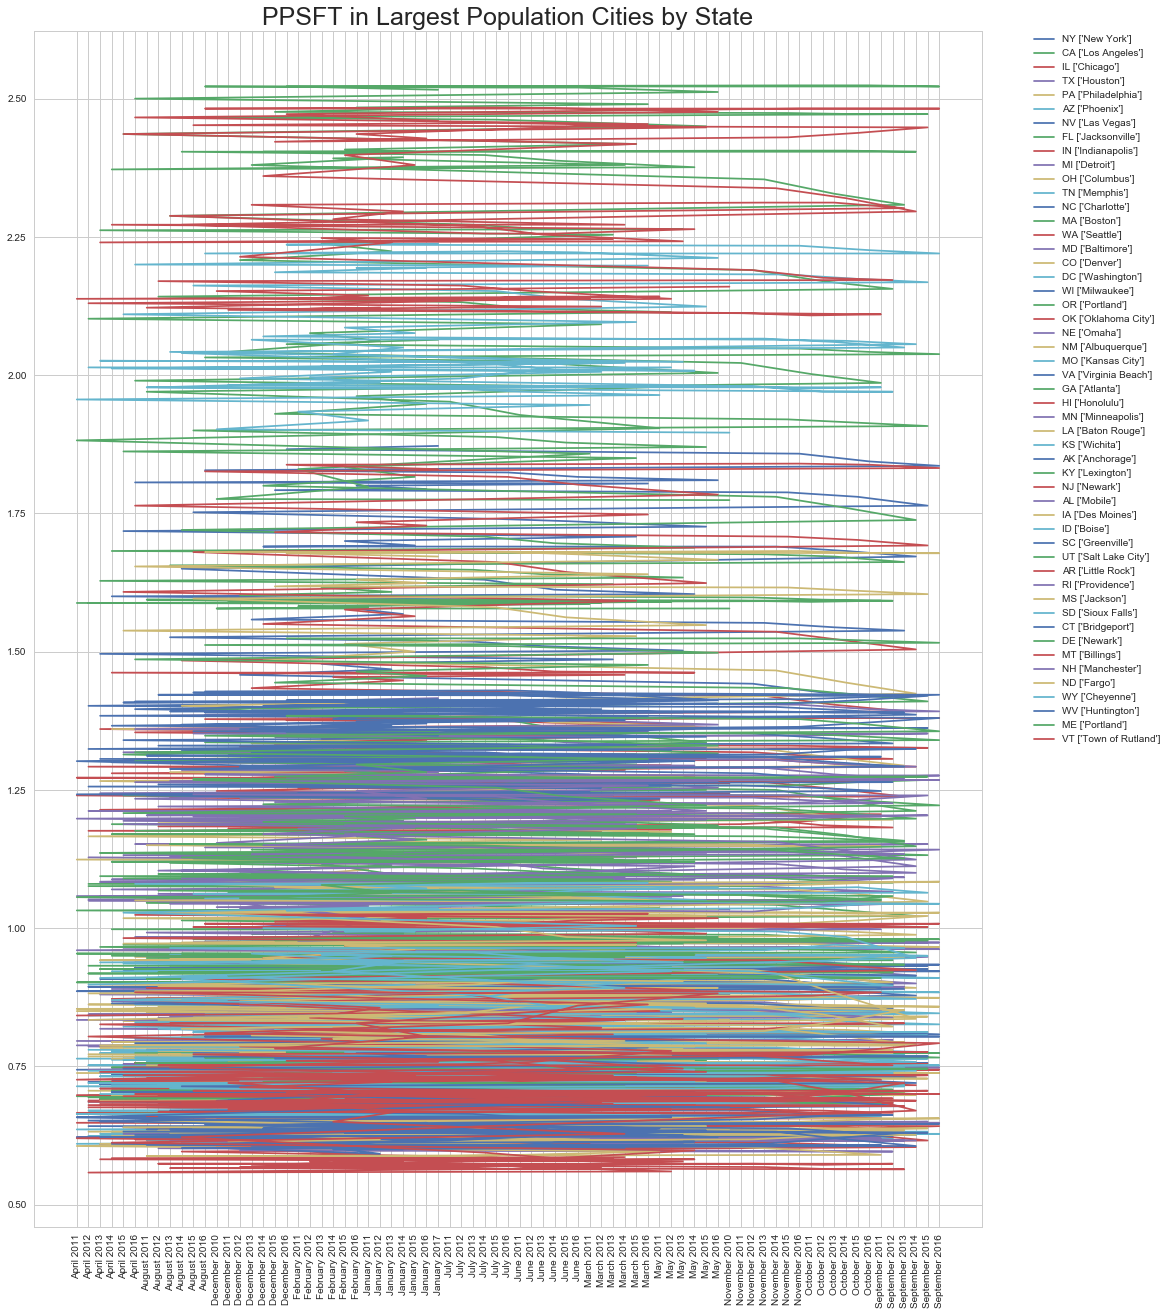

In [22]:
plt.figure(figsize = (17, 22))
for s in states:
    pr = df[df["State"] == s]
    r = min(pr["Population Rank"])
    pr = pr[pr["Population Rank"] == r]
    label = "{} {}".format(s, pr["City"].unique())
    pr = pr[months]
    plt.plot(pr.columns, np.transpose(pr.values), label = label)
    
plt.title("PPSFT in Largest Population Cities by State", fontsize = 25)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()


######  Median Rent for all States:

In [34]:
trace0 = go.Scatter(x= months, 
                    y = np.nanmedian(df_rent[df_rent["State"]=="NY"][months], axis = 0), name = "NY")

trace1 =go.Scatter(x= months, 
                    y = np.nanmedian(df_rent[df_rent["State"]=="CA"][months], axis = 0), name = "CA")
trace2 = go.Scatter(x= months, 
                    y = np.nanmedian(df_rent[df_rent["State"]=="HI"][months], axis = 0), name = "HI")

trace3 = go.Scatter(x= months, 
                    y = np.nanmedian(df_rent[df_rent["State"]=="DC"][months], axis = 0), name = "DC")

trace4 = go.Scatter(x= months, 
                    y = np.nanmedian(df_rent[df_rent["State"]=="AZ"][months], axis = 0), name = "AZ")

trace5 = go.Scatter(x= months, 
                    y = np.nanmedian(df_rent[df_rent["State"]=="FL"][months], axis = 0), name = "FL")

trace6 = go.Scatter(x= months, 
                    y = np.nanmedian(df_rent[df_rent["State"]=="TX"][months], axis = 0), name = "TX")

trace7 = go.Scatter(x= months, 
                    y = np.nanmedian(df_rent[df_rent["State"]=="IL"][months], axis = 0), name = "IL")

trace8 = go.Scatter(x= months, 
                    y = np.nanmedian(df_rent[df_rent["State"]=="NC"][months], axis = 0), name = "NC")

trace9 = go.Scatter(x= months, 
                    y = np.nanmedian(df_rent[df_rent["State"]=="NV"][months], axis = 0), name = "NV")

trace10 = go.Scatter(x= months, 
                    y = np.nanmedian(df_rent[df_rent["State"]=="OK"][months], axis = 0), name = "OK")

layout = go.Layout(title = "Median RENT for top 20 States", xaxis= dict(title = "RENT"),
                  yaxis = dict(title = "Months"))
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]
fig =go.Figure(data=data, layout = layout) 
py.iplot(fig)


/Users/keshavrastogi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning:

All-NaN slice encountered



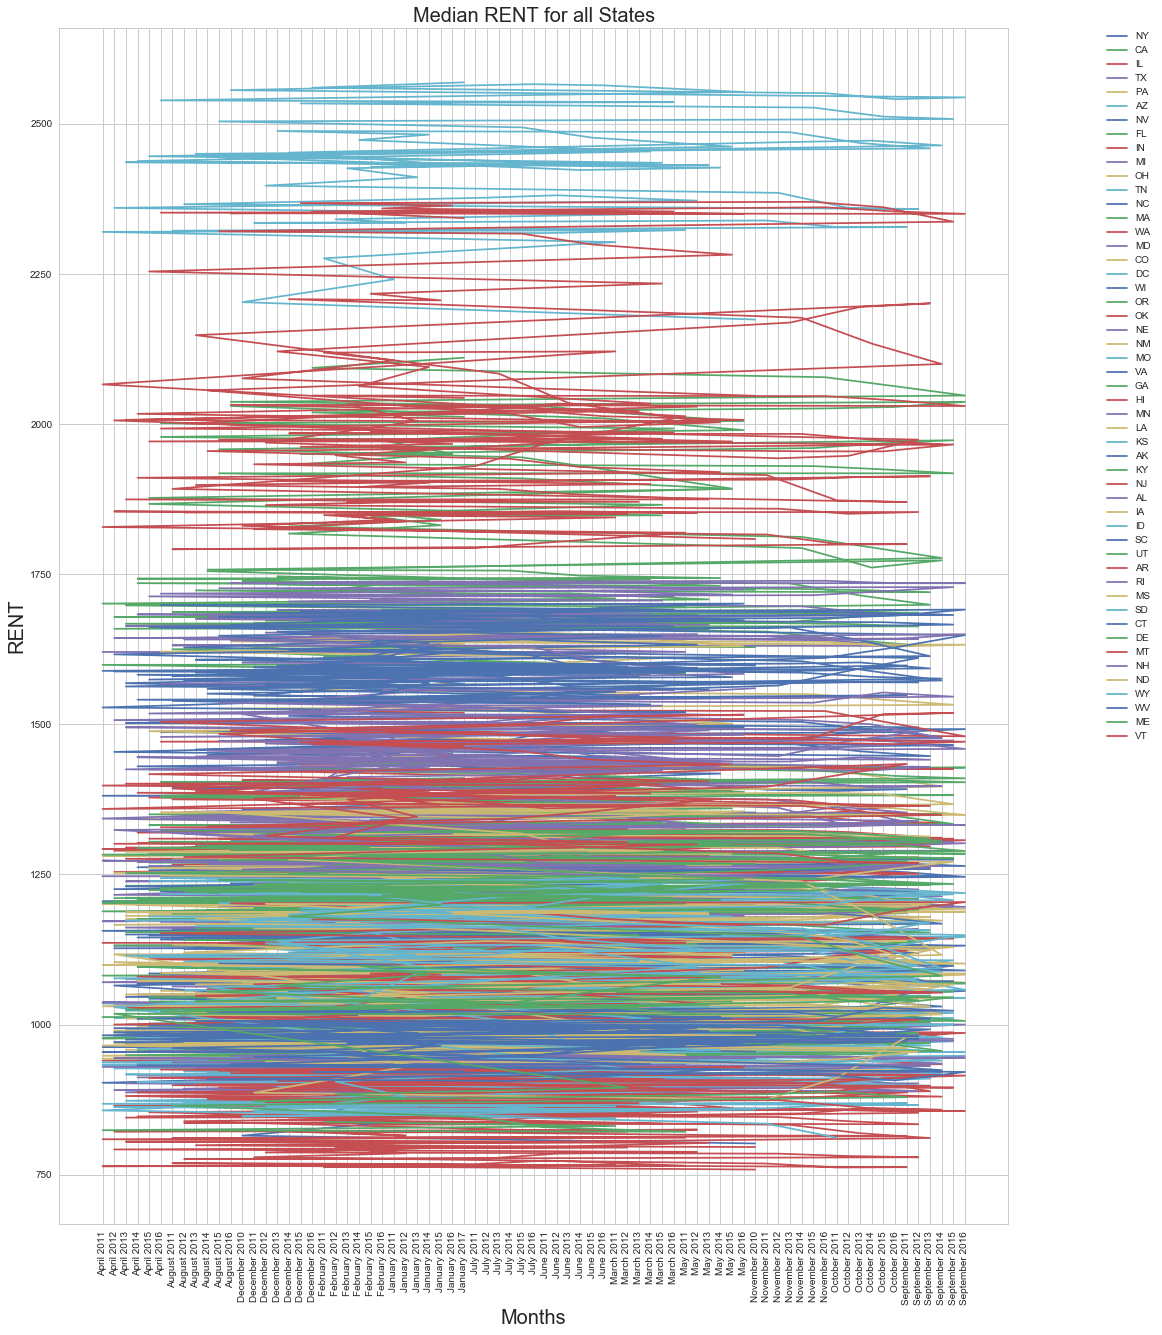

In [33]:

#Matplotlib plot
plt.figure(figsize=(17,22))

for st in states:
    st_pick = df_rent[df_rent["State"] == st][months]
    plt.plot(months, np.nanmedian(st_pick, axis=0), label = st)

plt.title("Median RENT for all States", fontsize = 20)    
plt.xlabel("Months", fontsize = 20)
plt.ylabel("RENT", fontsize = 20)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor = (1.1, 1), loc = 2, borderaxespad = 0)
plt.show()

######  Note: Washington DC has the Highest PPSFT and Rent prince. Following by Hawai at second place.****

###### 4. Lastly, let's take a look at California State. And, compare few of its metro.

In [24]:
cal= df[df["State"]=="CA"]
cal.head(10)

City Code           City          Metro         County State  \
1       12447    Los Angeles    Los Angeles    Los Angeles    CA   
8       54296      San Diego      San Diego      San Diego    CA   
10      33839       San Jose       San Jose    Santa Clara    CA   
12      20330  San Francisco  San Francisco  San Francisco    CA   
33      18203         Fresno         Fresno         Fresno    CA   
34      20288     Sacramento     Sacramento     Sacramento    CA   
36      46298     Long Beach    Los Angeles    Los Angeles    CA   
42      13072        Oakland  San Francisco        Alameda    CA   
53      16764        Anaheim    Los Angeles         Orange    CA   
54      47568      Santa Ana    Los Angeles         Orange    CA   

    Population Rank  November 2010  December 2010  January 2011  \
1                 2          1.578          1.578         1.580   
8                 9          1.492          1.494         1.492   
10               11          1.542          1.546         1.540   
12               13          2.502          2.526         2.516   
33               34          0.840          0.838         0.832   
34               35          0.918          0.926         0.928   
36               37          1.594          1.590         1.588   
42               43          1.396          1.404         1.414   
53               54          1.464          1.466         1.466   
54               55          1.566          1.564         1.566   

    February 2011      ...       April 2016  May 2016  June 2016  July 2016  \
1           1.582      ...            1.990     2.004      2.018      2.026   
8           1.490      ...            1.772     1.782      1.788      1.792   
10          1.530      ...            2.224     2.234      2.242      2.246   
12          2.468      ...            3.594     3.590      3.588      3.580   
33          0.822      ...            0.814     0.816      0.816      0.818   
34          0.930      ...            1.074     1.082      1.088      1.094   
36          1.586      ...            1.882     1.888      1.890      1.894   
42          1.424      ...            2.212     2.244      2.276      2.300   
53          1.466      ...            1.754     1.762      1.770      1.776   
54          1.568      ...            1.946     1.956      1.964      1.966   

    August 2016  September 2016  October 2016  November 2016  December 2016  \
1         2.032           2.038         2.042          2.048          2.056   
8         1.794           1.796         1.802          1.808          1.814   
10        2.246           2.240         2.232          2.224          2.210   
12        3.564           3.542         3.518          3.498          3.466   
33        0.820           0.820         0.822          0.822          0.822   
34        1.100           1.104         1.108          1.112          1.114   
36        1.898           1.906         1.916          1.928          1.938   
42        2.318           2.330         2.344          2.356          2.360   
53        1.782           1.788         1.792          1.794          1.800   
54        1.966           1.966         1.970          1.972          1.978   

    January 2017  
1          2.064  
8          1.816  
10         2.200  
12         3.442  
33         0.824  
34         1.118  
36         1.950  
42         2.358  
53         1.806  
54         1.986  

[10 rows x 81 columns]

/Users/keshavrastogi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning:

All-NaN slice encountered

/Users/keshavrastogi/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1018: RuntimeWarning:

Mean of empty slice



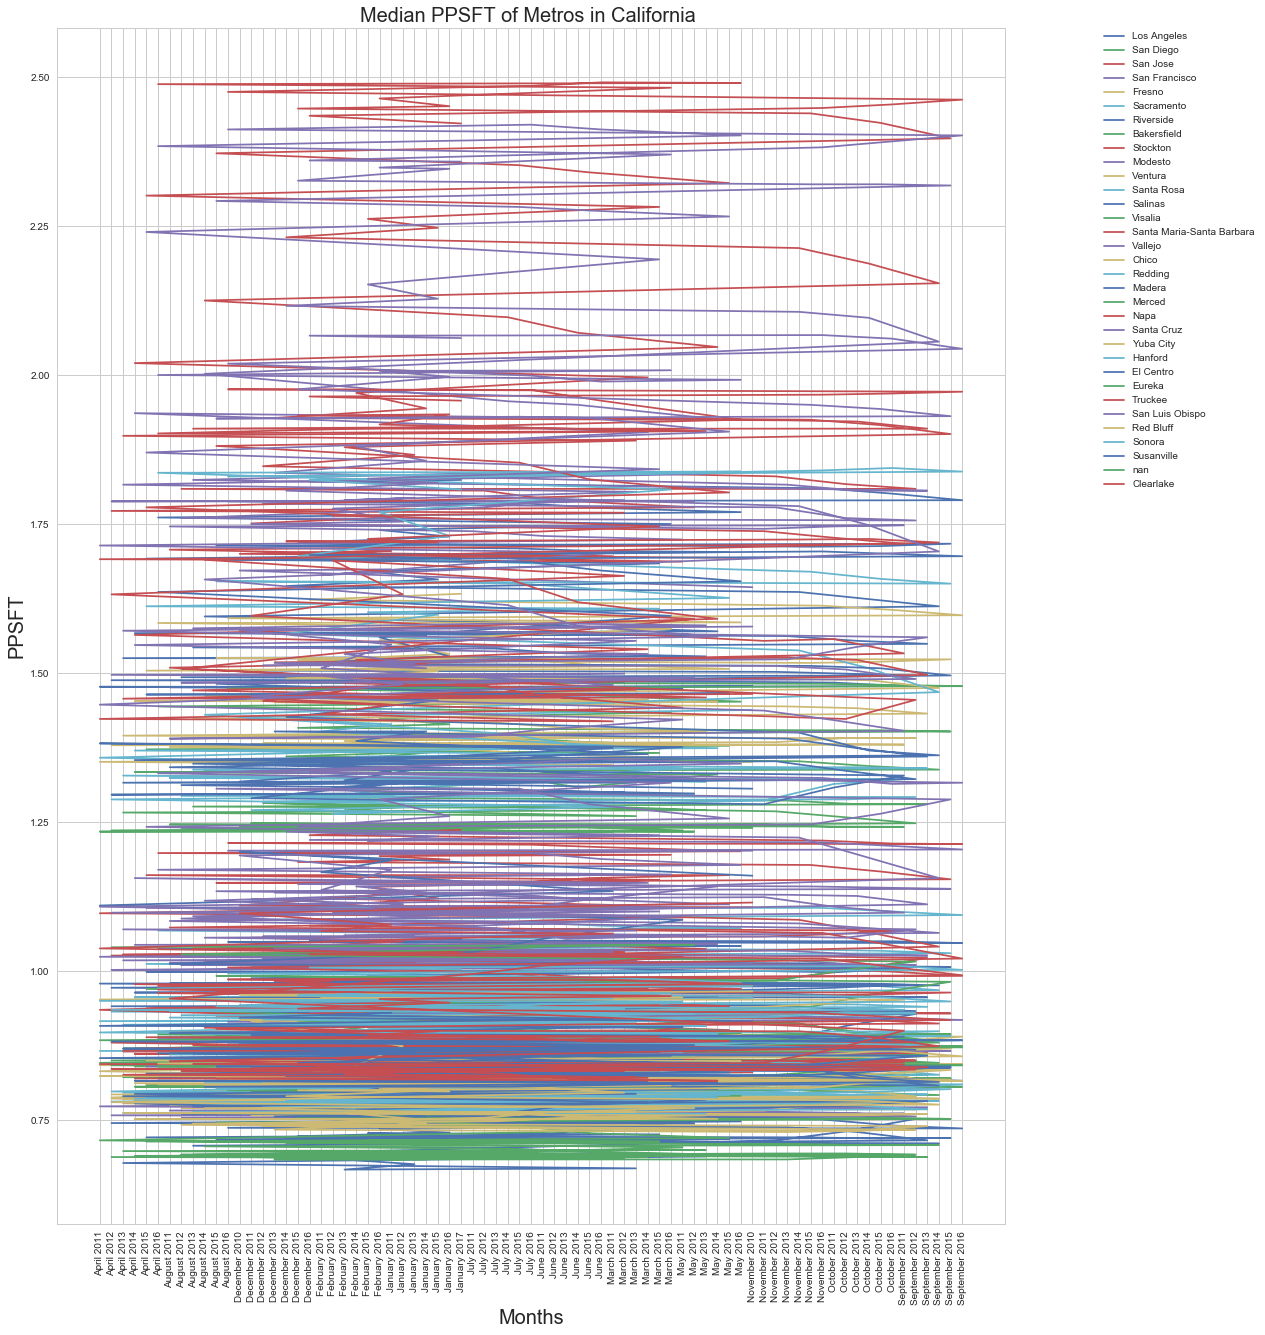

In [25]:
cal_met= cal["Metro"].unique()
#cal_met

plt.figure(figsize=(17,22))
for met in cal_met:
    met_price = cal[cal["Metro"]== met][months]
    plt.plot(months, np.nanmedian(met_price, axis = 0), label = met)


plt.title("Median PPSFT of Metros in California ", fontsize =20)    
plt.xlabel("Months", fontsize = 20)
plt.ylabel("PPSFT", fontsize = 20)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor = (1.1, 1), loc = 2, borderaxespad = 0)
plt.show()

 #### Why median prices instead of mean prices: 
 In their press releases, the Québec Federation of Real Estate Boards and the province's real estate boards are now using the median price to report on the evolution of property prices. Th National Association of Realtors in the United States has been using this measure for quite some time now to discuss property prices. Let us examine why the median is generally a better indicator than the average when dealing with property prices. The median is the middle point that divides a series into two equal parts. In our case, the median price allows you to divide all transactions into two equal parts: 50% of transactions occur at a price that is lower than the median price and
the other 50% occur at a price that is higher. For example, a median price of $150,000  indicates
that 50 percent of properties sold for less than $150,000 and the other 50% sold for more.
The advantage of the median as a measure  central tendency is that it is not adversely influenced by extreme numbers. And conversely, the disadvantage of the average is that it can be influenced by extreme numbers, which can lead to major distortions that bias data interpretation. Consider a geographical area in which property prices are generally in the $150,000 to $200,000 range. If, in one particular month, a property that is not representative of the geographic area sells for $2,000,000, this transaction pulls the average higher and results in an over-estimate of price growth in the area. The median price is not influenced by this $2,000,000 transaction. It thereby provides a truer reflection of the market in terms of prices and in terms of growth between two periods. Regardless of whether the median price or the average price is used, the fewer transactions there are on which to base the calculation, the more the data needs to be interpreted with caution. The standard for this calculation is a minimum of 30 transactions. With fewer than 30 transactions, there is increased risk that neither the median price nor the average price will provide a valid measure of the market value of all properties. The QFREB therefore uses this 30-sale minimum rule to determine whether or not to publish a median or average price. 

#### Source: QFREB  market analytics department. 